# `Central Limit Theorem Proof - Assignment`

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# `Data`: Age column of Churn Modeling

## Population mu

In [3]:
mean_age=data['Age'].mean()
mean_age

38.9218

## Population sigma

In [17]:
std_age=data['Age'].std()
std_age

10.487806451704591

## Distribution of Age
### Population Distribution

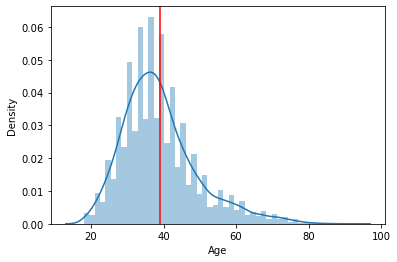

In [5]:
sns.distplot(data['Age'])
plt.axvline(mean_age,color='r')

In [6]:
data.shape

(10000, 14)


---

# Samples as a whole

## 500 samples of 20 each

In [7]:
n=20
samples=[data.Age.sample(n) for i in range(500)]   # stratified sampling 20 * 500 = 10000

## mean of samples

In [8]:
np.mean(samples)

38.7794

## std of samples

In [9]:
np.std(samples)

10.386170402992626

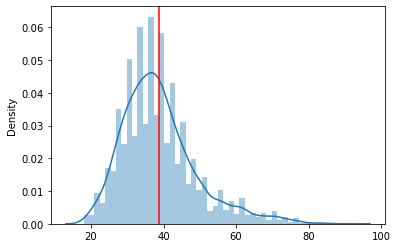

In [10]:
sns.distplot(samples)
plt.axvline(np.mean(samples),color='r')

# ---Proof of CLT---

For Sample Size: 2 
Confidence Interval is (49.14948698166119, 28.84451301833881) 
Mean=38.997 
Standard Error =5.1798402967659145


For Sample Size: 5 
Confidence Interval is (43.53791059500392, 34.86448940499609) 
Mean=39.20120000000001 
Standard Error =2.2126074464305683


For Sample Size: 10 
Confidence Interval is (40.837890170686904, 36.65130982931311) 
Mean=38.744600000000005 
Standard Error =1.0680051891259705


For Sample Size: 30 
Confidence Interval is (39.448345414020345, 38.064987919313005) 
Mean=38.756666666666675 
Standard Error =0.3528973200784026


For Sample Size: 100 
Confidence Interval is (39.10536916732428, 38.70199083267571) 
Mean=38.903679999999994 
Standard Error =0.10290263638993899


For Sample Size: 300 
Confidence Interval is (38.99663406749826, 38.85699259916842) 
Mean=38.92681333333334 
Standard Error =0.035622823553529914


For Sample Size: 500 
Confidence Interval is (38.976467333416494, 38.897964666583505) 
Mean=38.937216 
Standard Error =0.02002619051

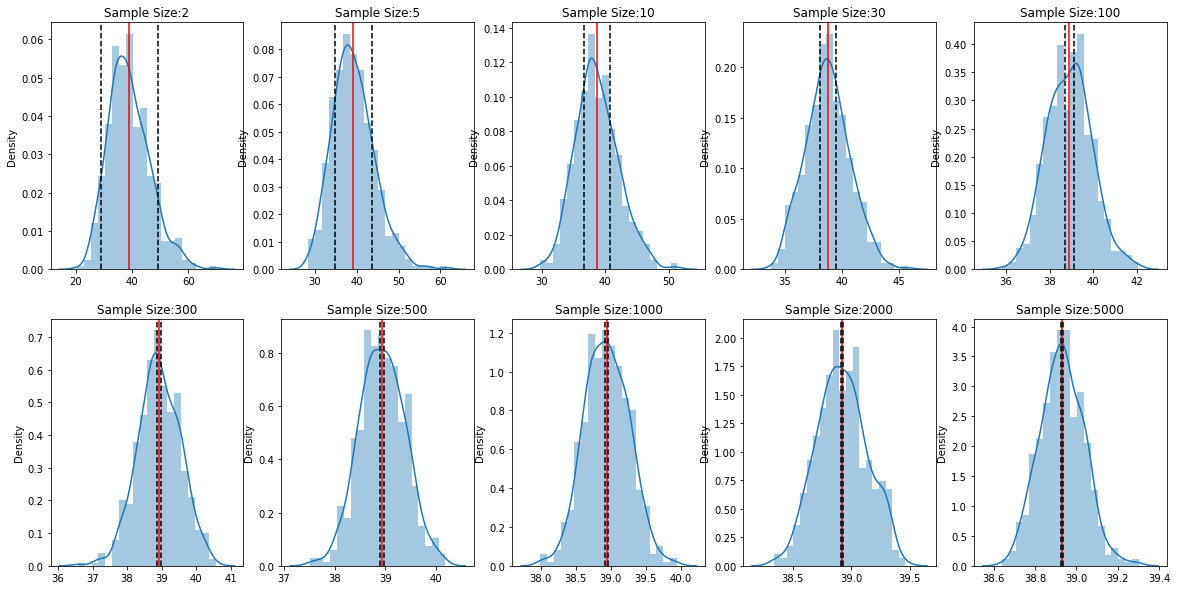

In [37]:
n=[2,5,10,30,100,300,500,1000,2000,5000]   # no of samples
cfi=[]
plt.figure(figsize=(20,10))
for index,sample_size in enumerate(n):
    sample_means=[data.Age.sample(sample_size).mean() for i in range(500)]  # size of each sample is 500
    plt.subplot(2,5,index+1)   # for subplots
    sns.distplot(sample_means,bins=20)
    plt.axvline(np.mean(sample_means),color='r') # mean
    plt.axvline((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # upper bound
    plt.axvline((np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # lower bound
    cfi=((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size))),(np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size))))))
    plt.title('Sample Size:'+str(sample_size))
    print(f'For Sample Size: {sample_size} \nConfidence Interval is {cfi} \nMean={np.mean(sample_means)} \nStandard Error ={np.std(sample_means)/np.sqrt(sample_size)}\n\n')

## As number of sample increases the Standard error decreases

## `NOTE: We take std of sample in standard error`

# ---Thank you---